# Задание

Цель: изучить применение методов разведочного анализа данных (EDA) для улучшения качества работы моделей машинного обучения.
Описание задания:
В домашнем задании нужно улучшить метрики RMSE, R2 модели линейной регрессии путем работы с данными, а именно проведения разведочного анализа данных. В качестве датасета необходимо загрузить данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR).

Этапы работы:
1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).
2. Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.
3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.
5. Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?
6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.
    a. Сделайте выводы.
    b. Удалите признаки на основании полученных значений, выводов.
    c. Повторите п. 3, п. 4 на измененных данных.
7. Исследуйте оставленные признаки на выбросы.
    a. Удалите выбросы в случае обнаружения.
    b. Повторите п. 3, п. 4 на измененных данных.
8. Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.
    a. Повторите п. 3, п. 4 на измененных данных.
9. Сформулируйте выводы по проделанной работе.
    a. Кратко опишите какие преобразования были сделаны с данными.
    b. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.
    c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.

Для получения зачета по этому домашнему заданию, минимально, должно быть реализовано обучение трех моделей классификации: на основе всех неизмененных признаков; на основе признаков, отобранных по значениям корреляций; на основе признаков, отобранных по значениям корреляций и с удалением выбросов в них. Должны быть выведены метрики RMSE, R2 моделей. Желательно добиться улучшения метрик.
Результат:
Получены знания по проведению разведочного анализа данных.
Форма выполнения:

In [67]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import reverse_geocoder as rg
from sklearn.preprocessing import LabelEncoder

## 1. Получите данные и загрузите их

In [68]:
df = fetch_california_housing(as_frame=True)["frame"]
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [69]:
# Результирующий датафрейма
df_score = pd.DataFrame(
    columns=["model", "RMSE_train", "RMSE_test", "R2_train", "R2_test", "attributes"]
)

# Функция для оценки модели и добавления результатов
def evaluate_model(name, model, X_train, X_test, y_train, y_test, attributes="-"):
    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказания
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Метрики
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # Добавление строки в результирующий датафрейм
    df_score.loc[len(df_score)] = {
        "model": name,
        "RMSE_train": rmse_train,
        "RMSE_test": rmse_test,
        "R2_train": r2_train,
        "R2_test": r2_test,
        "attributes": attributes,
    }

    return y_pred_train, y_pred_test

## 2. Проверьте данные на наличие пропусков.

Описание данных:
- MedInc        средний доход в блочной группе
- HouseAge      средний возраст домов в блочной группе
- AveRooms      среднее количество комнат на домохозяйство
- AveBedrms     среднее количество спален на домохозяйство
- Population    население блочной группы
- AveOccup      среднее количество членов домохозяйства
- Latitude      широта блочной группы
- Longitude     долгота блочной группы

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## 3. Разделите выборку на обучающее и тестовое подмножества.

In [71]:
X = df.drop(columns=["MedHouseVal"])
y = df["MedHouseVal"]
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.

In [73]:
model = LinearRegression()

In [74]:
# Обучение и логирование
y_pred_train, y_pred_test = evaluate_model(
    name="LR (без изменений)",
    model=model,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    attributes="Все атрибуты",
)

df_score

,model,RMSE_train,RMSE_test,R2_train,R2_test,attributes
0,LR (без изменений),0.719676,0.745581,0.612551,0.575788,Все атрибуты


## 5. Постройте график распределения целевой переменной.

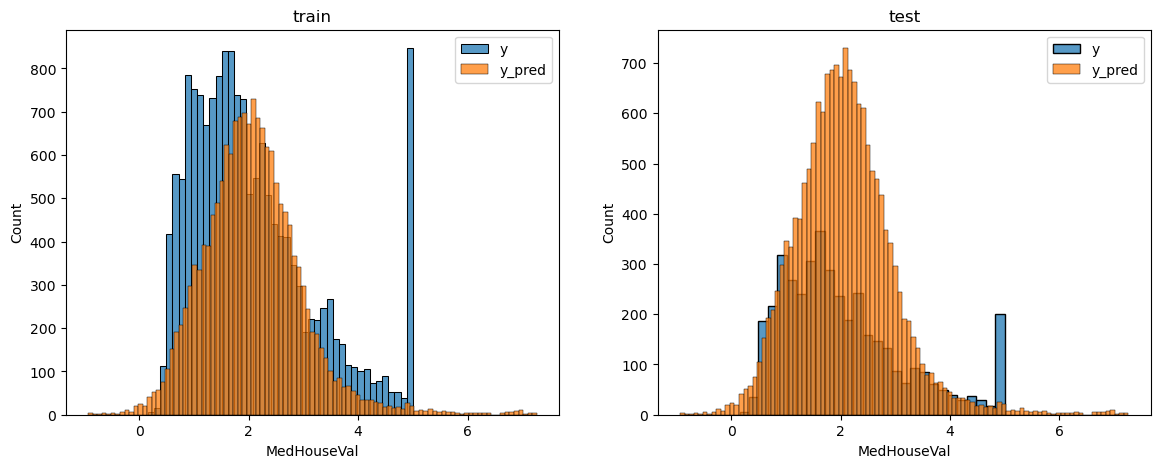

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(y_train, ax=ax[0], label="y")
sns.histplot(y_pred_train, ax=ax[0], label="y_pred").set_title("train")
sns.histplot(y_test, ax=ax[1], label="y")
sns.histplot(y_pred_train, ax=ax[1], label="y_pred").set_title("test")

ax[0].legend(["y", "y_pred"])
ax[1].legend(["y", "y_pred"])
plt.show()

Гистограммы для предсказанных и реальных значений отличаются:

- Распределение предсказанных значений стремится к нормальному и имеется небольшой сдвиг вправо.

- Реальные значения имеют выбросы в значении ~5.

## 6. Посчитайте и выведите корреляционную матрицу.

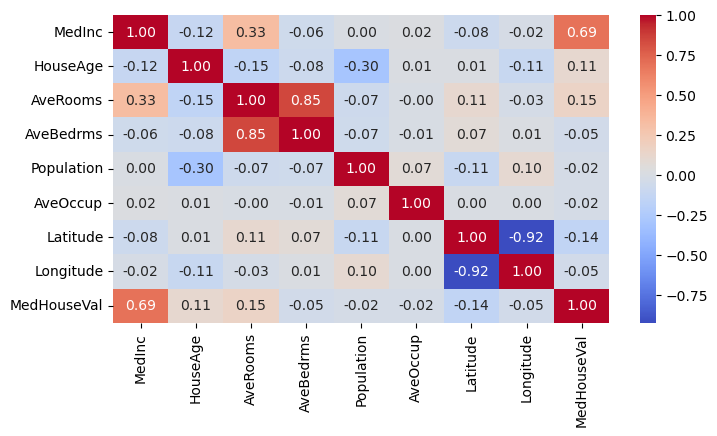

In [76]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

**Выводы:**
- MedInc имеет сильную положительную корреляцию с MedHouseVal (~0.69)
- Population и AveOccup слабые признаки
- AveRooms и AveBedrooms сильно коррелируют между собой (~0.85)

In [77]:
# Обучим модель без слабых и коррелирующих между собой признаков
X = df[["MedInc", "HouseAge", "AveRooms"]]
y = df["MedHouseVal"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Обучение и логирование
y_pred_train, y_pred_test = evaluate_model(
    name="LR (после корреляции)",
    model=model,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    attributes="['MedInc', 'HouseAge', 'AveRooms']",
)

df_score

,model,RMSE_train,RMSE_test,R2_train,R2_test,attributes
0,LR (без изменений),0.719676,0.745581,0.612551,0.575788,Все атрибуты
1,LR (после корреляции),0.804591,0.811733,0.515726,0.497172,"['MedInc', 'HouseAge', 'AveRooms']"


**Итого**:
- Изначальная модель (с большим числом признаков) была точнее и лучше объясняла поведение данных
- Упрощённая модель с меньшим числом признаков — хуже по обеим метрикам

## 7. Исследуйте оставленные признаки на выбросы

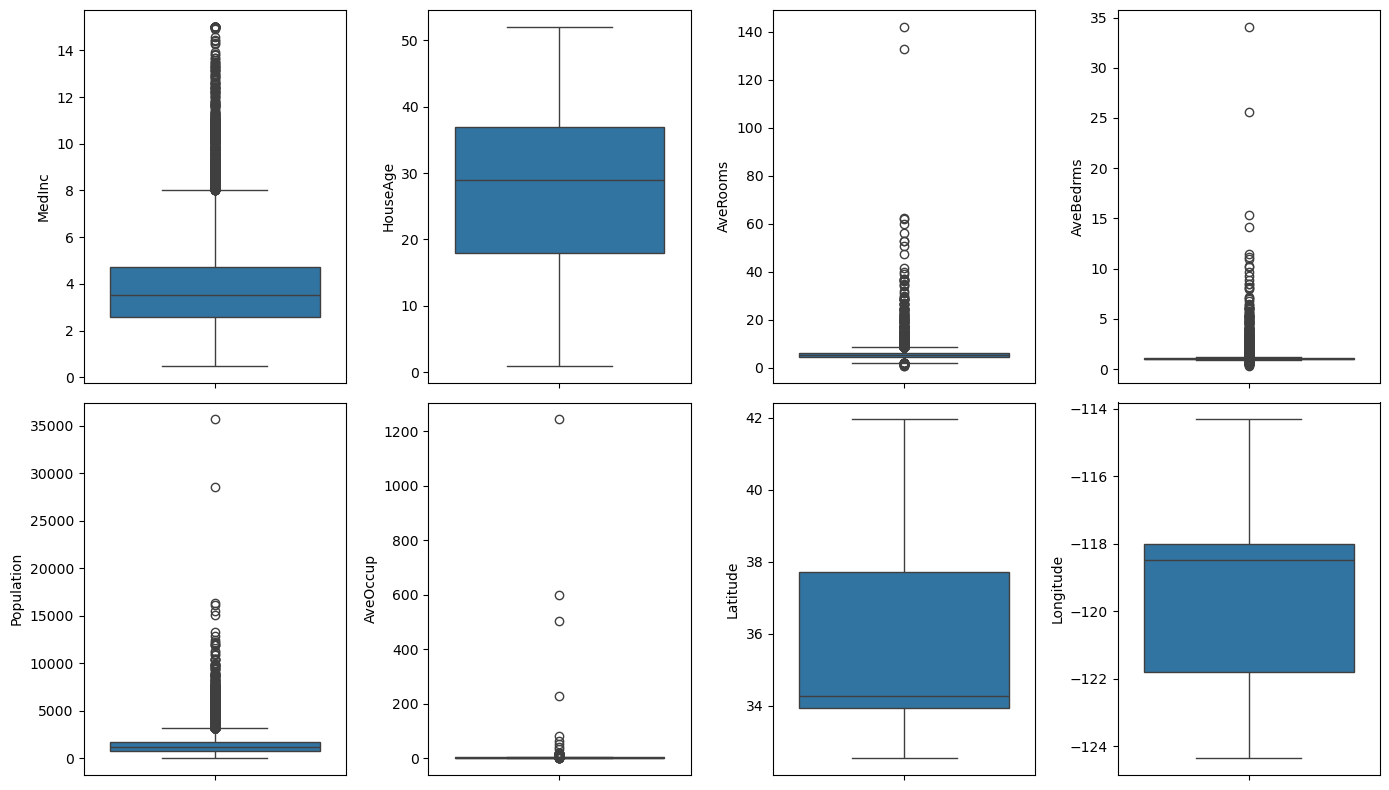

In [78]:
r, c = 2, 4
fig, ax = plt.subplots(r, c, figsize=(14, 8))

for i, col in zip(range(r * c), df.drop(["MedHouseVal"], axis=1).columns):
    sns.boxplot(df[col], ax=ax[1 if i >= 4 else 0][i - 4 if i >= 4 else i])
    plt.tight_layout()

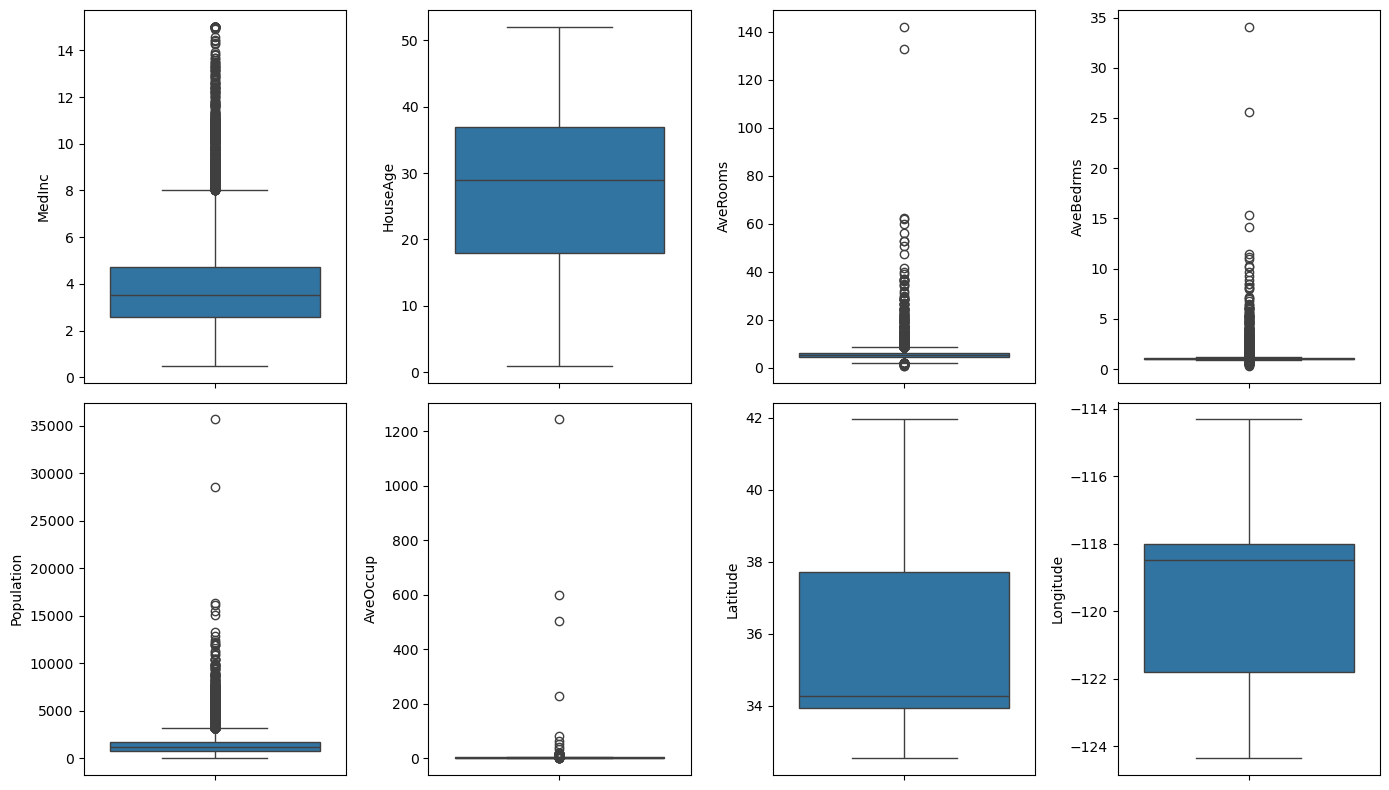

In [79]:
r, c = 2, 4
fig, ax = plt.subplots(r, c, figsize=(14, 8))

for i, col in zip(range(r * c), df.drop(["MedHouseVal"], axis=1).columns):
    sns.boxplot(df[col], ax=ax[1 if i >= 4 else 0][i - 4 if i >= 4 else i])
    plt.tight_layout()


In [80]:
def get_upperwhisker(df, column):
    up_q = np.percentile(df[column], 75)
    low_q = np.percentile(df[column], 25)
    diff = up_q - low_q

    up_w = df[col].loc[df[col] <= up_q + 1.5 * diff].max()
    low_w = df[col].loc[df[col] >= low_q - 1.5 * diff].min()

    return up_w, low_w

In [81]:
print("Выбросы:\n")

for col in df.columns:
    up_w, low_w = get_upperwhisker(df, col)

    outliers = len(df.loc[(df[col] > up_w) | (df[col] < low_w)])
    if outliers > 0:
        print(f"{col} - {round(outliers / len(df) * 100, 3)}%")


Выбросы:

MedInc - 3.299%
AveRooms - 2.476%
AveBedrms - 6.899%
Population - 5.795%
AveOccup - 3.445%
MedHouseVal - 5.189%


Согласно боксплотам в MedInc, AveRooms, AveBedrms, Population, AveOccup имеются выбросы:
- Доля выбросов от 2.476% до 6.899% от всех значений
- В целевой переменной MedHouseVal также имеются выбросы

In [82]:
X = df
for col in X.drop(["MedHouseVal"], axis=1):
    up_w, low_w = get_upperwhisker(X, col)
    X = X.loc[(X[col] <= up_w) & (df[col] >= low_w)]

# удаления данных, если удалить выбросы
round(1 - len(X) / len(df), 3) * 100

18.5

Удаление всех выбросов (кроме пропусков в целевой переменной) приведет к потере 18,5% данных, что много.

Можно попробровать удалить выбросы для тех атрибутов, которые минимально влияют на изменение MedHouseVal (согласно матрице корриляции) - AveBedrms, Population и AveOccup.

In [83]:
columns = ["AveBedrms", "Population", "AveOccup"]

X = df
for col in columns:
    up_w, low_w = get_upperwhisker(X, col)
    X = X.loc[(X[col] <= up_w) & (X[col] >= low_w)]

In [84]:
y = X["MedHouseVal"]
X = X.drop(["MedHouseVal"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Обучение и логирование
y_pred_train, y_pred_test = evaluate_model(
    name="LR (без выбросов)",
    model=model,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    attributes="Все атрибуты",
)

df_score

,model,RMSE_train,RMSE_test,R2_train,R2_test,attributes
0,LR (без изменений),0.719676,0.745581,0.612551,0.575788,Все атрибуты
1,LR (после корреляции),0.804591,0.811733,0.515726,0.497172,"['MedInc', 'HouseAge', 'AveRooms']"
2,LR (без выбросов),0.654077,0.661818,0.682729,0.683837,Все атрибуты


Новые покатзатели после удаления выборосов улучшились

## 8. Измените несколько признаков на выбор математически.

In [85]:
columns = ["AveBedrms", "Population", "AveOccup"]

X = df
for col in columns:
    up_w, low_w = get_upperwhisker(X, col)
    X = X.loc[(X[col] <= up_w) & (df[col] >= low_w)]

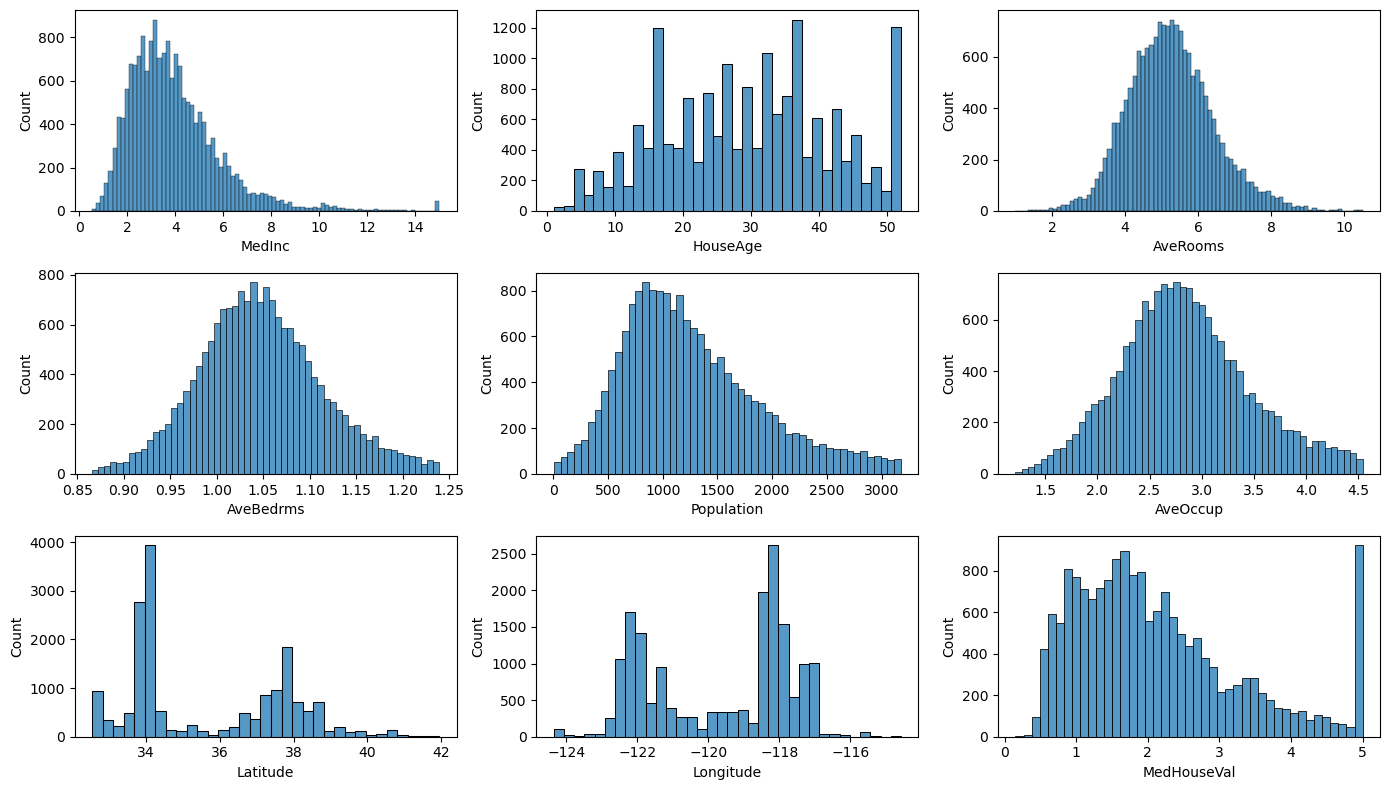

In [86]:
r, c = 3, 3
fig, ax = plt.subplots(r, c, figsize=(14, 8))

for i, col in zip(range(r * c), X.columns):
    sns.histplot(X[col], ax=ax[math.floor(i / r)][i % r])
    plt.tight_layout()


In [87]:
columns = ["AveBedrms", "Population", "AveOccup"]

X = df
for col in columns:
    up_w, low_w = get_upperwhisker(X, col)
    X = X.loc[(X[col] <= up_w) & (X[col] >= low_w)]

y = X["MedHouseVal"]

X["AveOccup"] = np.log(X["AveOccup"])
X["HouseAge"] = np.sqrt(X["HouseAge"])

res = rg.search(tuple(zip(X["Latitude"], X["Longitude"])))
X["City"] = [i.get("admin2") for i in res]
le = LabelEncoder()
le.fit(X["City"])
X["City"] = le.transform(X["City"])

X["District"] = [i.get("admin2") for i in res]
X = pd.get_dummies(X, columns=["District"])

X = X.drop(["MedHouseVal"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Обучение и логирование
y_pred_train, y_pred_test = evaluate_model(
    name="LR (после изменения и дополнения признаков)",
    model=model,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    attributes="Все атрибуты",
)

df_score

,model,RMSE_train,RMSE_test,R2_train,R2_test,attributes
0,LR (без изменений),0.719676,0.745581,0.612551,0.575788,Все атрибуты
1,LR (после корреляции),0.804591,0.811733,0.515726,0.497172,"['MedInc', 'HouseAge', 'AveRooms']"
2,LR (без выбросов),0.654077,0.661818,0.682729,0.683837,Все атрибуты
3,LR (после изменения и дополнения признаков),0.589399,0.594273,0.742374,0.745080,Все атрибуты


## 9. Выводы

In [88]:
df_score

,model,RMSE_train,RMSE_test,R2_train,R2_test,attributes
0,LR (без изменений),0.719676,0.745581,0.612551,0.575788,Все атрибуты
1,LR (после корреляции),0.804591,0.811733,0.515726,0.497172,"['MedInc', 'HouseAge', 'AveRooms']"
2,LR (без выбросов),0.654077,0.661818,0.682729,0.683837,Все атрибуты
3,LR (после изменения и дополнения признаков),0.589399,0.594273,0.742374,0.745080,Все атрибуты


**1. Корреляционной матрицы:**

Удаление слабых признаков приводит к ухудшению метрик. 

**2. Анализ выбросов:**

Удаление абсолютно всех выбросов приведет к потере 18,5% данных, что много.

При удалении выбросов из AveBedrms, Population и AveOccup метрики становятся лучше предыдущих

**3. Изменение атрибутов:**

Наилучшие результаты принесло изменение атрибутов AveOccup и HouseAge на log(AveOccup) и sqrt(HouseAge).

Добавлено 2 новых атрибута, вычисленные на основании долготы и широты с помощью reverse_geocoder - город и округ.

В итоге R2 = 0.74, а RMSE = 0.59.

В данном случае модель хорошо справляется.